# Задание
добавил визуалы и confusion_matrix

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, plot_confusion_matrix

In [30]:
df = pd.read_csv('C:\\netology\\net2020\\HR\\HR_2.csv')

2 Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).10

In [31]:
df.describe().append(df.mode().rename(index = lambda row: "mode" + str(row+1)))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,NaN,NaN
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,NaN,NaN
mode1,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000,sales,low
mode2,NaN,NaN,NaN,156.000000,NaN,NaN,NaN,NaN,NaN,NaN



3 Рассчитайте и визуализировать корреляционную матрицу дляколичественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.10

In [33]:
cm = df.loc[:,['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
cm 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


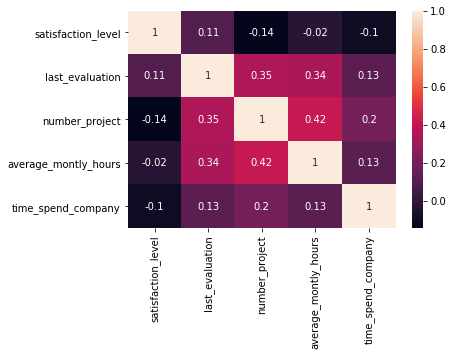

In [34]:
sns.heatmap(cm,annot=True)

Наиболее скоррелированны number_project и average_monthly_hours - логично))
наименее - average_monthly_hours и satisfaction_level.
satisfaction_level вообще плохо скоррелирован с имеющимися переменными, возможно есть что то еще


4 Рассчитайте сколько сотрудников работает в каждомдепартаменте.5

Text(0.5, 1.0, 'Qty of employees by department')

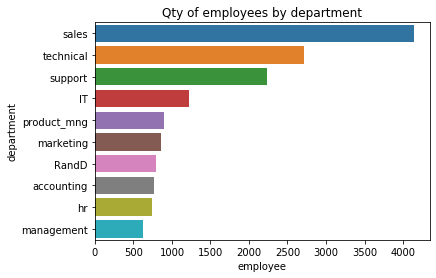

In [162]:
dep = df[['department','satisfaction_level']]\
    .rename(columns={'satisfaction_level':'employee'})\
    .groupby(['department']).count()\
    .sort_values(by = ['employee'], ascending = False)\
    .reset_index()

sns.barplot(y = "department", x="employee", data=dep, orient = 'h').set_title('Qty of employees by department')


5 Показать распределение сотрудников по зарплатам.5


In [135]:
df['percent'] = df.groupby(['salary'])['salary'].transform('count') / res['salary'].count() * 100
res_1 = df[['salary','percent']].groupby(['salary']).max().sort_values('percent',ascending=False)
res_1

,percent
salary,
low,48.776585
medium,42.976198
high,8.247216


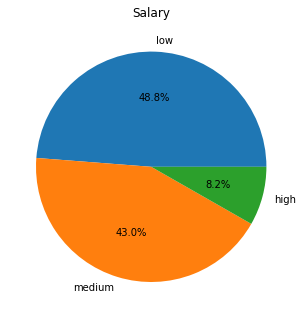

In [138]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(res_1['percent'],labels = res_1.reset_index()['salary'], autopct='%1.1f%%')
ax.set_title('Salary')
plt.show()


6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности5

In [154]:
df['perc_salary_per_dep'] = df.groupby(['salary','department'])['salary'].transform('count') / res.groupby('department')['salary'].transform('count') * 100 
res_2 = df[['department','salary','perc_salary_per_dep']].groupby(['department','salary']).agg('max')
res_2 = res_2.reset_index()
res_2

,department,salary,perc_salary_per_dep
0,IT,high,6.764466
1,IT,low,49.633252
2,IT,medium,43.602282
3,RandD,high,6.480305
4,RandD,low,46.251588
5,RandD,medium,47.268107
6,accounting,high,9.647979
7,accounting,low,46.675359
8,accounting,medium,43.676662
9,hr,high,6.089310


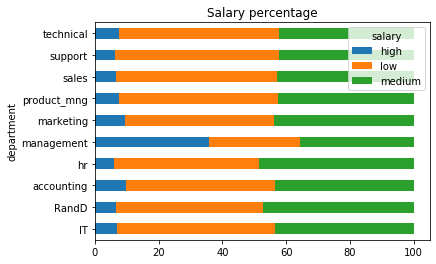

In [157]:
res_2.pivot(index='department', columns='salary', values='perc_salary_per_dep').reset_index().plot( 
    x = 'department', 
    kind = 'barh', 
    stacked = True, 
    title = 'Salary percentage', 
    mark_right = True) 

7 Проверить гипотезу, что сотрудники с высоким окладомпроводят на работе больше времени, чем сотрудники с низкимокладом10



8 Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
    ●Доля сотрудников с повышением за последние 5 лет
    ●Средняя степень удовлетворенности
    ●Среднее количество проектов

In [101]:
res
.groupby(['left'])['salary'].count()
res['dim'] =  'left - ' + df['left'].map(str) + ' ' + 'promotion - ' + df['promotion_last_5years'].map(str)
res['perc_per_left'] = res.groupby(['left','promotion_last_5years'])['salary'].transform('count') / res.groupby('left')['salary'].transform('count') * 100 
res.groupby(['left','promotion_last_5years']).agg({'number_project':'mean','satisfaction_level':'mean','perc_per_left':'max'})


number_project  satisfaction_level  perc_per_left
left promotion_last_5years                                                   
0    0                            3.786395            0.666766      97.374869
     1                            3.796667            0.668433       2.625131
1    0                            3.859797            0.439992      99.467936
     1                            3.052632            0.460000       0.532064

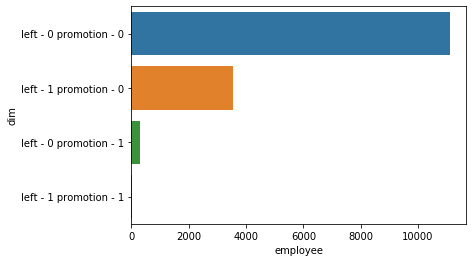

In [109]:

res_1 = res[['dim','satisfaction_level']]\
    .rename(columns={'satisfaction_level':'employee'})\
    .groupby(['dim']).count()\
    .sort_values(by = ['employee'], ascending = False)\
    .reset_index()

sns.barplot(y = "dim", x="employee", data=res_1, orient = 'h')

Text(0.5, 1.0, 'Кол-во проектов')

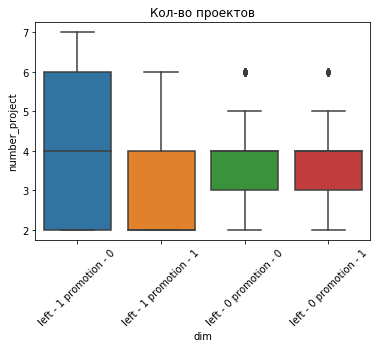

In [110]:
ax = sns.boxplot(x="dim", y="number_project", orient = "v", 
            data=res)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title('Кол-во проектов')

Повышение никак не учитывает количество выполненных проектов, хотя у больше половины уволившихся - максимум проектов

9 Разделить данные на тестовую и обучающую выборкиПостроить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department иsalary)Оценить качество модели на тестовой выборки20

In [215]:
df_train, df_test = train_test_split(df, test_size = 0.5)
y_train, y_test = df_train['left'], df_test['left']

In [216]:
for df_ in [df_train,df_test]:
    for col in df_.columns:
        if df_[col].dtype == 'O' or df_[col].name == 'left':
            del(df_[col]) 
            # print(df_[col].name)
df_train


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,percent,perc_per_left,perc_salary_per_dep
6713,0.83,0.86,3,179,2,0,0,42.976198,97.374869,47.268107
11865,0.74,0.87,5,224,2,0,0,42.976198,97.374869,42.261104
11098,0.69,0.83,4,252,3,0,0,42.976198,97.374869,35.714286
3320,0.21,0.70,3,104,2,0,0,48.776585,97.374869,50.441176
11245,0.48,0.81,4,149,2,0,0,42.976198,97.374869,35.714286
...,...,...,...,...,...,...,...,...,...,...
1713,0.63,0.93,5,163,3,0,0,42.976198,99.467936,48.579161
5733,0.59,0.51,4,184,2,0,0,48.776585,97.374869,46.853147
11070,0.86,0.91,4,253,3,0,0,48.776585,97.374869,49.633252
2993,0.66,0.52,3,149,4,1,0,42.976198,97.374869,42.801932


In [217]:
lda = LinearDiscriminantAnalysis()
class_ = lda.fit(df_train, y_train)

In [218]:
lda.predict(df_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [222]:
acc = pd.DataFrame([y_test.values, lda.predict(df_test)]).T
acc['check_errors'] = acc[0] == acc[1]
acc.loc[acc['check_errors']==False,:]

,0,1,check_errors
879,1,0,False
1545,1,0,False
3234,1,0,False
3760,1,0,False
4005,1,0,False
4166,1,0,False
4346,1,0,False
5051,1,0,False
6069,1,0,False
6708,1,0,False


In [223]:
accuracy_score(y_test, lda.predict(df_test))

0.9986666666666667

Confusion matrix, without normalization
[[5704    0]
 [  10 1786]]


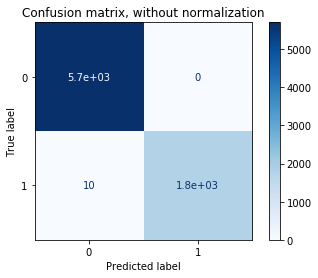

Normalized confusion matrix


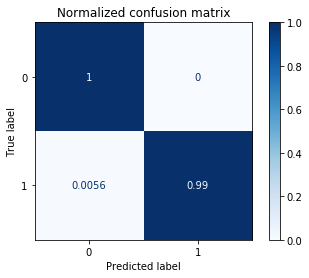

In [224]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(class_, df_test, y_test,
                                #  display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    if normalize != 'true':
        print(disp.confusion_matrix)
    plt.show()

In [ ]:
Моделька ошибается на полпроцента, не предсказывая увольнение. 